In [31]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

class CleanBotDatasetGenerator:
    def __init__(self, seed=42):
        random.seed(seed)
        np.random.seed(seed)
        
        # Bot archetypes
        self.bot_types = {
            "crude_bot": {
                "weight": 0.35,
                "account_age_range": (0, 14),
                "followers_range": (0, 100),
                "following_range": (500, 2000),
                "profile_completeness": 0.2,
                "burst_probability": 0.8,
                "off_hours_activity": 0.9,
                "engagement_velocity": "very_fast",
            },
            "sophisticated_bot": {
                "weight": 0.25,
                "account_age_range": (30, 365),
                "followers_range": (200, 3000),
                "following_range": (100, 800),
                "profile_completeness": 0.7,
                "burst_probability": 0.4,
                "off_hours_activity": 0.3,
                "engagement_velocity": "fast",
            },
            "compromised_account": {
                "weight": 0.15,
                "account_age_range": (180, 1000),
                "followers_range": (500, 8000),
                "following_range": (200, 1500),
                "profile_completeness": 0.9,
                "burst_probability": 0.6,
                "off_hours_activity": 0.7,
                "engagement_velocity": "medium",
            },
            "purchased_followers": {
                "weight": 0.15,
                "account_age_range": (14, 180),
                "followers_range": (1000, 20000),
                "following_range": (50, 500),
                "profile_completeness": 0.8,
                "burst_probability": 0.5,
                "off_hours_activity": 0.5,
                "engagement_velocity": "medium",
            },
            "coordinated_inauthentic": {
                "weight": 0.10,
                "account_age_range": (7, 90),
                "followers_range": (100, 1000),
                "following_range": (200, 1000),
                "profile_completeness": 0.6,
                "burst_probability": 0.9,
                "off_hours_activity": 0.8,
                "engagement_velocity": "very_fast",
            }
        }

        # Engagement velocity patterns
        self.velocity_patterns = {
            "very_fast": (0.1, 2),
            "fast": (1, 10),
            "medium": (10, 120),
            "slow": (120, 3600),
            "human_like": (30, 1800)
        }

    def generate_user_profile(self, user_id, is_bot, bot_type=None):
        if is_bot and bot_type:
            bot_config = self.bot_types[bot_type]
            account_age = random.randint(*bot_config["account_age_range"])
            followers = random.randint(*bot_config["followers_range"])
            following = random.randint(*bot_config["following_range"])
            profile_pic = int(random.random() < bot_config["profile_completeness"])
            bio_length = int(np.random.exponential(20)) if profile_pic else 0
            verified = 0
            location_consistent = int(random.random() < 0.3)
        else:
            account_age = int(np.random.exponential(200)) + 30
            followers = int(np.random.lognormal(4, 1.5))
            following = int(np.random.lognormal(4, 1))
            profile_pic = int(random.random() < 0.85)
            bio_length = int(np.random.exponential(50)) if profile_pic else 0
            verified = int(random.random() < 0.02)
            location_consistent = int(random.random() < 0.9)
            bot_type = "human"
        
        return {
            "user_id": user_id,
            "account_age_days": int(account_age),
            "followers_count": int(followers),
            "following_count": int(following),
            "profile_pic": profile_pic,
            "bio_length": bio_length,
            "verified": verified,
            "location_consistent": location_consistent,
            "bot_type": bot_type,
            "is_bot": int(is_bot)
        }

    def generate_device_info(self, is_bot):
        if is_bot:
            if random.random() < 0.6:
                ip_prefix = random.choice(["185.220", "192.168", "10.0", "172.16"])
            else:
                ip_prefix = f"{random.randint(1,223)}.{random.randint(0,255)}"
            timezone_offset = random.choice([-8, -5, 0, 1, 8])
        else:
            ip_prefix = f"{random.randint(1,223)}.{random.randint(0,255)}"
            timezone_offset = random.randint(-12, 12)
        return {
            "ip_address": f"{ip_prefix}.{random.randint(1,254)}.{random.randint(1,254)}",
            "timezone_offset": timezone_offset
        }

    def generate_temporal_pattern(self, user_profile, num_events):
        base_time = datetime.now() - timedelta(days=random.randint(1, 30))
        timestamps = []
        if user_profile["is_bot"]:
            bot_config = self.bot_types[user_profile["bot_type"]]
            if random.random() < bot_config["burst_probability"]:
                burst_duration = random.randint(10, 300)
                for _ in range(num_events):
                    offset_minutes = random.randint(0, burst_duration)
                    timestamp = base_time + timedelta(minutes=offset_minutes)
                    if random.random() < bot_config["off_hours_activity"]:
                        timestamp = timestamp.replace(hour=random.randint(2, 6))
                    timestamps.append(timestamp)
            else:
                for _ in range(num_events):
                    days_offset = random.randint(0, 7)
                    minutes_offset = random.randint(0, 1440)
                    timestamps.append(base_time + timedelta(days=days_offset, minutes=minutes_offset))
        else:
            for _ in range(num_events):
                days_offset = int(np.random.exponential(2))
                hour = random.choices(range(24), weights=[0.1]*6 + [0.4,0.6,0.8,0.9,1.0,1.0,0.9,0.8,0.9,1.0,1.0,0.9,0.8,0.7,0.6,0.4,0.3,0.2])[0]
                minute = random.randint(0, 59)
                timestamps.append(base_time + timedelta(days=days_offset, hours=hour, minutes=minute))
        return sorted(timestamps)

    # def generate_dataset(self, num_videos=20, num_users=200, bot_fraction=0.25, save_to_csv=True, filename="clean_bot_dataset.csv"):
    #     videos = [{"video_id": f"v{i+1}", "creator_id": f"creator_{i+1}"} for i in range(num_videos)]
        
    #     num_bots = int(num_users * bot_fraction)
    #     users = []
    #     for i in range(num_bots):
    #         bot_type = random.choices(list(self.bot_types.keys()), 
    #                                   weights=[self.bot_types[bt]["weight"] for bt in self.bot_types.keys()])[0]
    #         users.append(self.generate_user_profile(f"bot_user_{i+1}", True, bot_type))
    #     for i in range(num_users - num_bots):
    #         users.append(self.generate_user_profile(f"human_user_{i+1}", False))
    #     random.shuffle(users)

    #     events = []
    #     for uid, user in enumerate(users):
    #         device_info = self.generate_device_info(user["is_bot"])
    #         engaged_videos = random.sample(videos, k=random.randint(1, min(5, len(videos))))
    #         for video in engaged_videos:
    #             num_events = random.choice([1,2,3])
    #             for t in self.generate_temporal_pattern(user, num_events):
    #                 event_type = random.choices(["view","like","share","comment"], weights=[0.7,0.2,0.07,0.03])[0]
    #                 velocity_range = self.velocity_patterns["human_like"] if not user["is_bot"] else self.velocity_patterns[self.bot_types[user["bot_type"]]["engagement_velocity"]]
    #                 engagement_duration = random.uniform(*velocity_range)
    #                 events.append({
    #                     "event_id": f"e{len(events)+1}",
    #                     "timestamp": t.isoformat(),
    #                     "user_id": user["user_id"],
    #                     "is_bot": user["is_bot"],
    #                     "bot_type": user["bot_type"],
    #                     "account_age_days": user["account_age_days"],
    #                     "followers_count": user["followers_count"],
    #                     "following_count": user["following_count"],
    #                     "profile_pic": user["profile_pic"],
    #                     "bio_length": user["bio_length"],
    #                     "verified": user["verified"],
    #                     "location_consistent": user["location_consistent"],
    #                     "ip_address": device_info["ip_address"],
    #                     "timezone_offset": device_info["timezone_offset"],
    #                     "video_id": video["video_id"],
    #                     "creator_id": video["creator_id"],
    #                     "event_type": event_type,
    #                     "engagement_duration": round(engagement_duration, 2)
    #                 })
        
    #     df = pd.DataFrame(events)
    #     if save_to_csv:
    #         df.to_csv(filename, index=False)
    #         print(f"Dataset saved to {filename}, shape={df.shape}")
    #     return df
    
    def generate_dataset(self, 
        creator_videos_map,  # dict: {creator_id: [video_id1, video_id2, ...]}
        num_users=200, 
        bot_fraction=0.25, 
        save_to_csv=True, 
        filename="clean_bot_dataset.csv"
    ):
        # Flatten into a list of {video_id, creator_id}
        videos = []
        for creator_id, vids in creator_videos_map.items():
            for v in vids:
                videos.append({"video_id": v, "creator_id": creator_id})

        num_videos = len(videos)

        # --- user generation ---
        num_bots = int(num_users * bot_fraction)
        users = []
        for i in range(num_bots):
            bot_type = random.choices(
                list(self.bot_types.keys()), 
                weights=[self.bot_types[bt]["weight"] for bt in self.bot_types.keys()]
            )[0]
            users.append(self.generate_user_profile(f"{i+1}", True, bot_type))

        for i in range(num_users - num_bots):
            users.append(self.generate_user_profile(f"{i+1+num_bots}", False))
        random.shuffle(users)

        events = []
        for user in users:
            device_info = self.generate_device_info(user["is_bot"])
            engaged_videos = random.sample(videos, k=random.randint(1, min(5, num_videos)))
            for video in engaged_videos:
                num_events = random.choice([1, 2, 3])
                for t in self.generate_temporal_pattern(user, num_events):
                    event_type = random.choices(
                        ["view", "like", "share", "comment"], 
                        weights=[0.7, 0.2, 0.07, 0.03]
                    )[0]
                    velocity_range = (
                        self.velocity_patterns["human_like"] 
                        if not user["is_bot"] 
                        else self.velocity_patterns[self.bot_types[user["bot_type"]]["engagement_velocity"]]
                    )
                    engagement_duration = random.uniform(*velocity_range)
                    events.append({
                        "event_id": f"e{len(events)+1}",
                        "timestamp": t.isoformat(),
                        "user_id": user["user_id"],
                        "is_bot": user["is_bot"],
                        "bot_type": user["bot_type"],
                        "account_age_days": user["account_age_days"],
                        "followers_count": user["followers_count"],
                        "following_count": user["following_count"],
                        "profile_pic": user["profile_pic"],
                        "bio_length": user["bio_length"],
                        "verified": user["verified"],
                        "location_consistent": user["location_consistent"],
                        "ip_address": device_info["ip_address"],
                        "timezone_offset": device_info["timezone_offset"],
                        "video_id": video["video_id"],
                        "creator_id": video["creator_id"],
                        "event_type": event_type,
                        "engagement_duration": round(engagement_duration, 2)
                    })

        df = pd.DataFrame(events)
        if save_to_csv:
            df.to_csv(filename, index=False)
            print(f"Dataset saved to {filename}, shape={df.shape}")
        return df



In [27]:
gen = CleanBotDatasetGenerator()
df = gen.generate_dataset(
    num_videos=20, 
    num_users=1000, 
    bot_fraction=0.1, 
    save_to_csv=True, 
    filename="test_skibidi.csv"
)


Dataset saved to test_skibidi.csv, shape=(6068, 18)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("clean_skibidi_dataset.csv")

# Assume 'label' column: 1=bot, 0=human
X = df.drop(columns=["is_bot", "event_id", "timestamp", "user_id", "bot_type", "ip_address", "video_id", "creator_id", "event_type"])
y = df["is_bot"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# Scale features (important for IsolationForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("===== Random Forest (Supervised) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


===== Random Forest (Supervised) =====
Accuracy: 1.0
Confusion Matrix:
 [[985   0]
 [  0 241]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       241

    accuracy                           1.00      1226
   macro avg       1.00      1.00      1.00      1226
weighted avg       1.00      1.00      1.00      1226



In [9]:
iso_clf = IsolationForest(
    n_estimators=200,
    contamination=0.2,  # estimate fraction of bots in dataset
    random_state=42
)
iso_clf.fit(X_train_scaled)  # fit without labels
y_pred_iso = iso_clf.predict(X_test_scaled)

# Convert IF output (-1=anomaly, 1=normal) to label format (1=bot, 0=human)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]

print("===== Isolation Forest (Unsupervised) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_iso))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso))
print("Classification Report:\n", classification_report(y_test, y_pred_iso))

===== Isolation Forest (Unsupervised) =====
Accuracy: 0.8287112561174551
Confusion Matrix:
 [[871 114]
 [ 96 145]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       985
           1       0.56      0.60      0.58       241

    accuracy                           0.83      1226
   macro avg       0.73      0.74      0.74      1226
weighted avg       0.83      0.83      0.83      1226



In [10]:
def aggregate_per_user(df):
    agg_funcs = {
        "video_id": pd.Series.nunique,  # num_videos_engaged
        "event_id": "count",            # total_events
        "engagement_duration": "mean",  # avg_engagement_duration
        "account_age_days": "first",
        "followers_count": "first",
        "following_count": "first",
        "profile_pic": "first",
        "bio_length": "first",
        "verified": "first",
        "location_consistent": "first",
        "timezone_offset": "first",
        "is_bot": "first",
        "bot_type": "first"
    }

    user_df = df.groupby("user_id").agg(agg_funcs).reset_index()
    user_df = user_df.rename(columns={
        "video_id": "num_videos_engaged",
        "event_id": "total_events",
        "engagement_duration": "avg_engagement_duration"
    })
    return user_df

# Apply aggregation
user_features = aggregate_per_user(df)
print(user_features.head())

        user_id  num_videos_engaged  total_events  avg_engagement_duration  \
0    bot_user_1                   4             7                70.618571   
1   bot_user_10                   1             2                 1.825000   
2  bot_user_100                   1             3                 3.093333   
3  bot_user_101                   5             6                 6.888333   
4  bot_user_102                   2             5                 5.752000   

   account_age_days  followers_count  following_count  profile_pic  \
0               205             6574              763            1   
1                 3               12             1278            0   
2               237              876              578            0   
3               231             2624              677            1   
4               266              944              151            1   

   bio_length  verified  location_consistent  timezone_offset  is_bot  \
0           9         0              

In [11]:
# Feature engineering
X["events_per_video"] = X["total_events"] / X["num_videos_engaged"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KeyError: 'total_events'

In [12]:
# Assume user_features is your aggregated per-user dataset
# Drop non-numeric columns for Isolation Forest
X = user_features.drop(columns=["user_id", "is_bot", "bot_type"])
y = user_features["is_bot"]

# Optional: create simple numeric features only
# e.g., followers/following ratio
X["followers_following_ratio"] = X["followers_count"] / (X["following_count"] + 1)

# Train-test split (stratify to keep bot ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Fit Isolation Forest
# contamination = approximate fraction of bots in training set
contamination = y_train.mean()
iso = IsolationForest(
    n_estimators=200,
    max_samples="auto",
    contamination=contamination,
    random_state=42
)
iso.fit(X_train)

# Predict: Isolation Forest outputs -1 for anomalies, 1 for normal
y_pred = iso.predict(X_test)
# Convert to 0/1: 1 for bot, 0 for human
y_pred = (y_pred == -1).astype(int)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[230  10]
 [ 20  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       240
           1       0.80      0.67      0.73        60

    accuracy                           0.90       300
   macro avg       0.86      0.81      0.83       300
weighted avg       0.90      0.90      0.90       300



In [13]:
def aggregate_per_user(df):
    agg_funcs = {
        "video_id": pd.Series.nunique,   # num_videos_engaged
        "event_id": "count",             # total_events
        "engagement_duration": "mean",   # avg_engagement_duration
        "account_age_days": "first",
        "followers_count": "first",
        "following_count": "first",
        "profile_pic": "first",
        "bio_length": "first",
        "verified": "first",
        "location_consistent": "first",
        "timezone_offset": "first",
        "is_bot": "first",
        "bot_type": "first"
    }

    user_df = df.groupby("user_id").agg(agg_funcs).reset_index()
    user_df = user_df.rename(columns={
        "video_id": "num_videos_engaged",
        "event_id": "total_events",
        "engagement_duration": "avg_engagement_duration"
    })
    return user_df

# Aggregate
user_features = aggregate_per_user(df)

In [14]:
# --- 2. Feature engineering ---
X = user_features.drop(columns=["user_id", "is_bot", "bot_type"])
y = user_features["is_bot"]

# New numeric features
X["followers_following_ratio"] = X["followers_count"] / (X["following_count"] + 1)
X["events_per_video"] = X["total_events"] / (X["num_videos_engaged"] + 1)
X["bio_per_account_age"] = X["bio_length"] / (X["account_age_days"] + 1)

# --- 3. Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# --- 5. Isolation Forest (unsupervised) ---
# Contamination = small fraction of bots to reduce false positives
contamination = y_train.mean() * 0.8  # slightly lower to avoid wrongly flagging humans
iso = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination=contamination,
    random_state=42,
)
iso.fit(X_train)

# --- 6. Predict ---
y_pred = iso.predict(X_test)
y_pred = (y_pred == -1).astype(int)  # -1 anomaly -> bot

# --- 7. Evaluation ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[229  11]
 [ 30  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       240
           1       0.73      0.50      0.59        60

    accuracy                           0.86       300
   macro avg       0.81      0.73      0.76       300
weighted avg       0.85      0.86      0.85       300



C:\Users\jeany\AppData\Local\Temp\ipykernel_43772\1397068953.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["followers_following_ratio"] = X["followers_count"] / (X["following_count"] + 1)
C:\Users\jeany\AppData\Local\Temp\ipykernel_43772\1397068953.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["events_per_video"] = X["total_events"] / (X["num_videos_engaged"] + 1)
c:\Users\jeany\Desktop\NUS\Projects\TikTokJam-2025\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMet

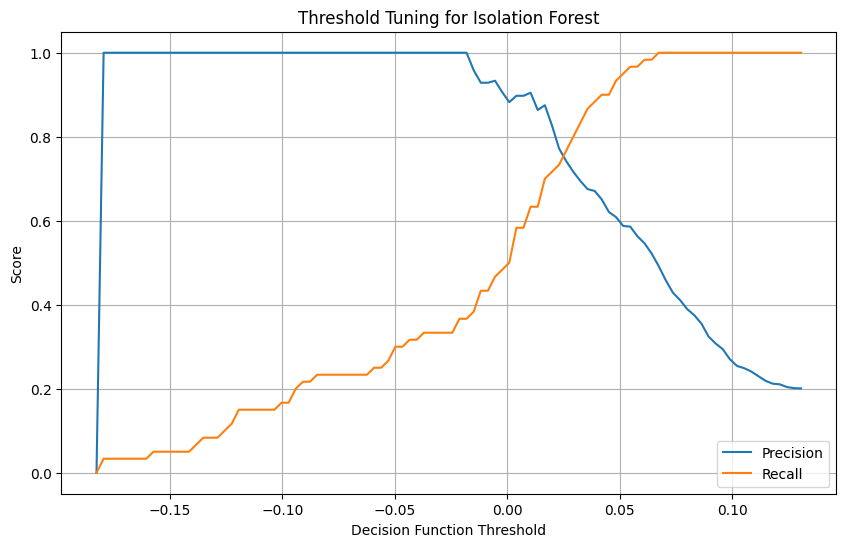

Confusion Matrix at optimal threshold:
[[240   0]
 [ 58   2]]

Classification Report at optimal threshold:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       240
           1       1.00      0.03      0.06        60

    accuracy                           0.81       300
   macro avg       0.90      0.52      0.48       300
weighted avg       0.84      0.81      0.73       300



In [19]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Aggregate per-user features ---
def aggregate_per_user(df):
    agg_funcs = {
        "video_id": pd.Series.nunique,   # num_videos_engaged
        "event_id": "count",             # total_events
        "engagement_duration": "mean",   # avg_engagement_duration
        "account_age_days": "first",
        "followers_count": "first",
        "following_count": "first",
        "profile_pic": "first",
        "bio_length": "first",
        "verified": "first",
        "location_consistent": "first",
        "timezone_offset": "first",
        "is_bot": "first",
        "bot_type": "first"
    }
    user_df = df.groupby("user_id").agg(agg_funcs).reset_index()
    user_df = user_df.rename(columns={
        "video_id": "num_videos_engaged",
        "event_id": "total_events",
        "engagement_duration": "avg_engagement_duration"
    })
    return user_df

user_features = aggregate_per_user(df)

# --- 2. Feature engineering (high signal only) ---
X = user_features[[
    "account_age_days", "followers_count", "following_count",
    "avg_engagement_duration", "total_events", "num_videos_engaged"
]]
y = user_features["is_bot"]

# Ratios
X["followers_following_ratio"] = X["followers_count"] / (X["following_count"] + 1)
X["events_per_video"] = X["total_events"] / (X["num_videos_engaged"] + 1)

# --- 3. Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# --- 5. Isolation Forest ---
contamination = y_train.mean() * 0.8
iso = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination=contamination,
    random_state=42,
)
iso.fit(X_train)

# --- 6. Decision function for threshold tuning ---
scores = iso.decision_function(X_test)  # higher = more normal
thresholds = np.linspace(scores.min(), scores.max(), 100)

precision_list = []
recall_list = []

for thresh in thresholds:
    y_pred = (scores < thresh).astype(int)  # anomalies -> bots
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))

# --- 7. Plot precision vs recall by threshold ---
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_list, label="Precision")
plt.plot(thresholds, recall_list, label="Recall")
plt.xlabel("Decision Function Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for Isolation Forest")
plt.legend()
plt.grid(True)
plt.show()

# --- 8. Choose threshold (example: high precision for humans) ---
optimal_thresh = thresholds[np.argmax(precision_list)]  # max human precision
y_pred_opt = (scores < optimal_thresh).astype(int)

print("Confusion Matrix at optimal threshold:")
print(confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report at optimal threshold:")
print(classification_report(y_test, y_pred_opt))

In [20]:
def add_temporal_features(events_df):
    df = events_df.copy()
    
    # Group per user
    agg = []
    for uid, user_df in df.groupby("user_id"):
        timestamps = pd.to_datetime(user_df["timestamp"]).sort_values()
        diffs = timestamps.diff().dt.total_seconds().dropna()
        if len(diffs) == 0:
            burst_score = 0
            avg_time_between = 0
        else:
            # burst_score: max per 1-min window / mean per 1-min
            counts_per_min = timestamps.groupby(timestamps.dt.floor('1min')).count()
            burst_score = counts_per_min.max() / (counts_per_min.mean() + 1e-6)
            avg_time_between = diffs.mean()
        
        # off-hours ratio
        off_hours = timestamps.dt.hour.isin(range(0,6)).mean()
        
        agg.append({
            "user_id": uid,
            "burst_score": burst_score,
            "avg_time_between": avg_time_between,
            "off_hours_ratio": off_hours
        })
    
    return pd.DataFrame(agg)

In [21]:
def add_engagement_features(events_df):
    df = events_df.copy()
    agg = []
    for uid, user_df in df.groupby("user_id"):
        total_events = len(user_df)
        num_videos = user_df["video_id"].nunique()
        events_per_video = total_events / (num_videos + 1e-6)
        
        followers_following_ratio = user_df["followers_count"].iloc[0] / (user_df["following_count"].iloc[0]+1)
        
        # Event type fractions
        counts = user_df["event_type"].value_counts(normalize=True)
        view_frac = counts.get("view", 0)
        like_frac = counts.get("like", 0)
        share_frac = counts.get("share", 0)
        comment_frac = counts.get("comment", 0)
        
        agg.append({
            "user_id": uid,
            "events_per_video": events_per_video,
            "followers_following_ratio": followers_following_ratio,
            "view_frac": view_frac,
            "like_frac": like_frac,
            "share_frac": share_frac,
            "comment_frac": comment_frac
        })
    return pd.DataFrame(agg)


In [22]:
user_agg = aggregate_per_user(df)
temporal_feats = add_temporal_features(df)
engagement_feats = add_engagement_features(df)

user_features = user_agg.merge(temporal_feats, on="user_id").merge(engagement_feats, on="user_id")


Optimal threshold: -0.019
Confusion Matrix at optimal threshold:
[[207  38]
 [  5  50]]

Classification Report at optimal threshold:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       245
           1       0.57      0.91      0.70        55

    accuracy                           0.86       300
   macro avg       0.77      0.88      0.80       300
weighted avg       0.90      0.86      0.87       300



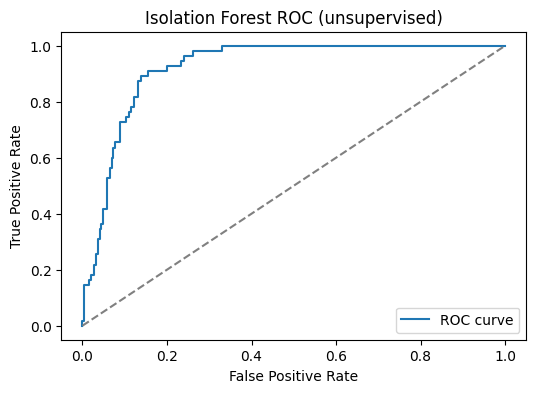

In [23]:
from sklearn.metrics import roc_curve


labels = user_features["is_bot"].values
X = user_features.drop(columns=["user_id", "is_bot", "bot_type"])

# --- 4. Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 5. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# --- 6. Isolation Forest ---
clf = IsolationForest(contamination=0.25, random_state=42)
clf.fit(X_train)

# --- 7. Decision function & threshold tuning ---
scores = -clf.decision_function(X_test)  # higher = more anomalous
fpr, tpr, thresholds = roc_curve(y_test, scores)

# Choose threshold maximizing human precision (or other criteria)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")

y_pred = (scores >= optimal_threshold).astype(int)

# --- 8. Evaluation ---
print("Confusion Matrix at optimal threshold:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report at optimal threshold:")
print(classification_report(y_test, y_pred))

# --- 9. Optional: ROC plot ---
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Isolation Forest ROC (unsupervised)")
plt.legend()
plt.show()

### REAL SHIT


In [32]:
gen = CleanBotDatasetGenerator()
# df = gen.generate_dataset(
#     num_videos=200, 
#     num_users=200, 
#     bot_fraction=0.2, 
#     save_to_csv=True, 
#     filename="test_skibidi.csv"
# )

In [33]:
from collections import defaultdict
import re


def extract_creators_and_videos(sql_file_path):
    creators_dict = defaultdict(list)

    # This regex captures everything inside VALUES(...)
    values_pattern = re.compile(r"VALUES\s*\((.*)\);", re.DOTALL)

    with open(sql_file_path, "r", encoding="utf-8") as f:
        for line in f:
            match = values_pattern.search(line)
            if not match:
                continue

            values_str = match.group(1)
            
            # Split by commas that are not inside quotes
            parts = re.split(r",(?=(?:[^']*'[^']*')*[^']*$)", values_str.strip())

            # Clean whitespace and surrounding quotes
            parts = [p.strip().strip("'") for p in parts]

            if len(parts) < 3:
                continue

            video_id = parts[0]
            creator_id = parts[2]

            creators_dict[creator_id].append(video_id)

    return creators_dict


sql_file = r"C:\Users\jeany\Desktop\NUS\Projects\TikTokJam-2025\ai\scripts\video.sql"  # your SQL file
creators_videos = extract_creators_and_videos(sql_file)

print(creators_videos)  # dict: {creator_id: [video_id1, video_id2, ...]}

defaultdict(<class 'list'>, {'727': ['b58c3991_tiktok_7480905344793791762_video.mp4'], '656': ['312644b9_tiktok_7532793031649512712_video.mp4'], '925': ['24ddcf76_tiktok_7518294413584518418_video.mp4'], '120': ['4b3edb21_tiktok_7527430885956783382_video.mp4'], '303': ['c07dddab_tiktok_7449999917877120299_video.mp4'], '518': ['b9ab2b72_tiktok_7434424247029763374_video.mp4'], '861': ['faac9fd8_tiktok_7525274214937529622_video.mp4'], '139': ['f090a615_tiktok_7247868927445847301_video.mp4', '8c43606f_tiktok_7226890678834384171_video.mp4'], '897': ['89940286_tiktok_7502018523397459207_video.mp4'], '609': ['944f4610_tiktok_7505814798114884865_video.mp4'], '97': ['3757599c_tiktok_7541110263248997654_video.mp4'], '660': ['bfaec030_tiktok_7521694239118331149_video.mp4', 'bd2d2f3f_tiktok_7540356614256200982_video.mp4'], '494': ['49ce783d_tiktok_7522264619419766046_video.mp4'], '207': ['dbfb8e7d_tiktok_7510221822164602130_video.mp4', 'e48c46e6_tiktok_7532902237073460486_video.mp4'], '358': ['5614

In [34]:
df = gen.generate_dataset(creators_videos, num_users=200, bot_fraction=0.25)

Dataset saved to clean_bot_dataset.csv, shape=(1172, 18)
